In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('housing.csv')

In [24]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


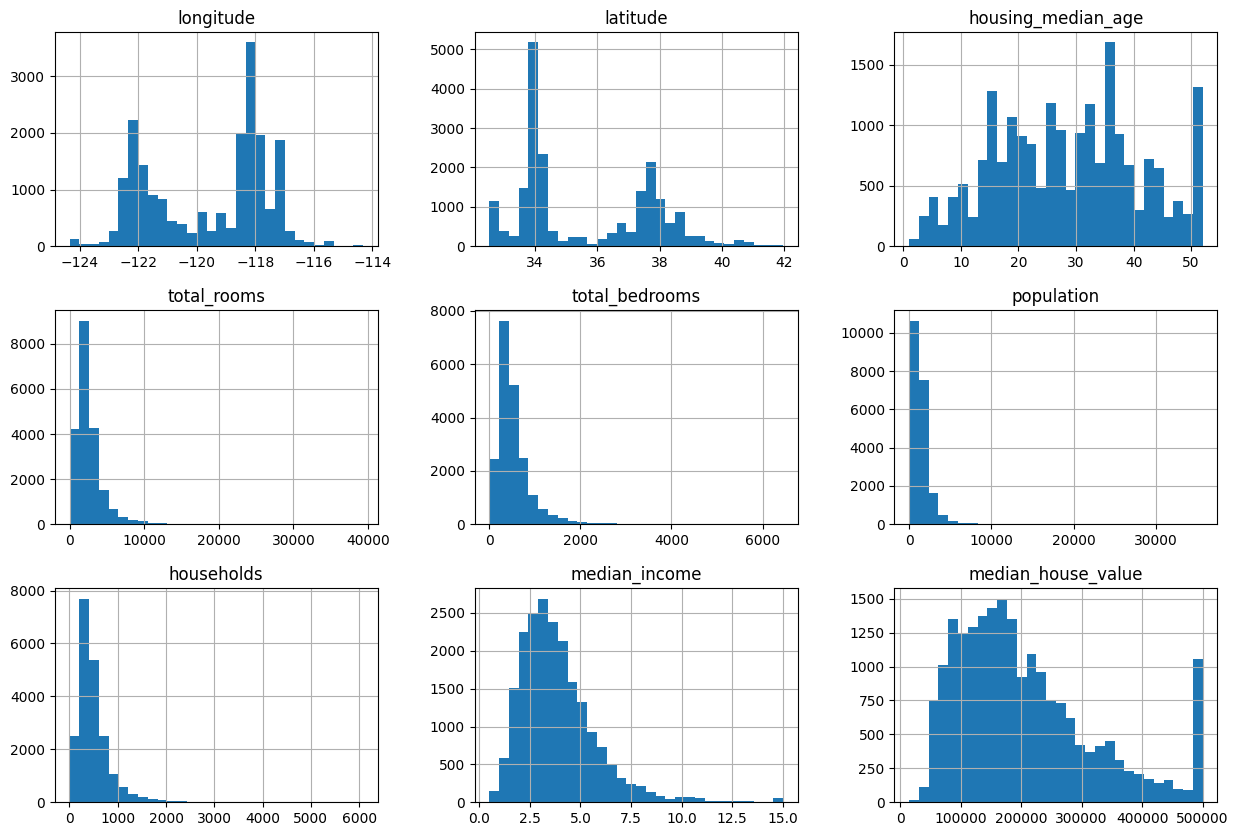

In [25]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

In [26]:
import seaborn as sns

/home/thearkknight/anaconda3/envs/CHP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thearkknight/anaconda3/envs/CHP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thearkknight/anaconda3/envs/CHP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thearkknight/anaconda3/envs/CHP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

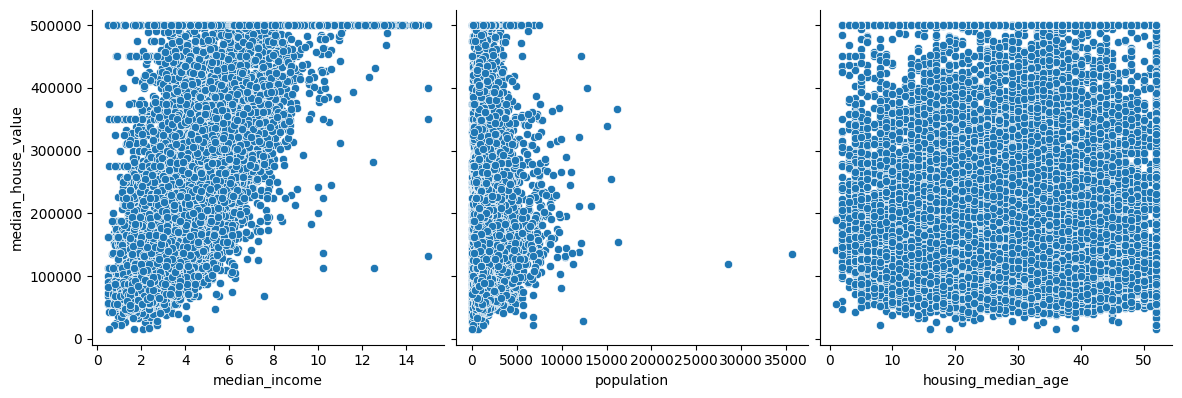

In [27]:
sns.pairplot(data, x_vars=["median_income", "population", "housing_median_age"], y_vars=["median_house_value"], height=4)
plt.show()

In [28]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['ocean_proximity'], dtype='object')


In [29]:
data = pd.get_dummies(data, columns=['ocean_proximity'])


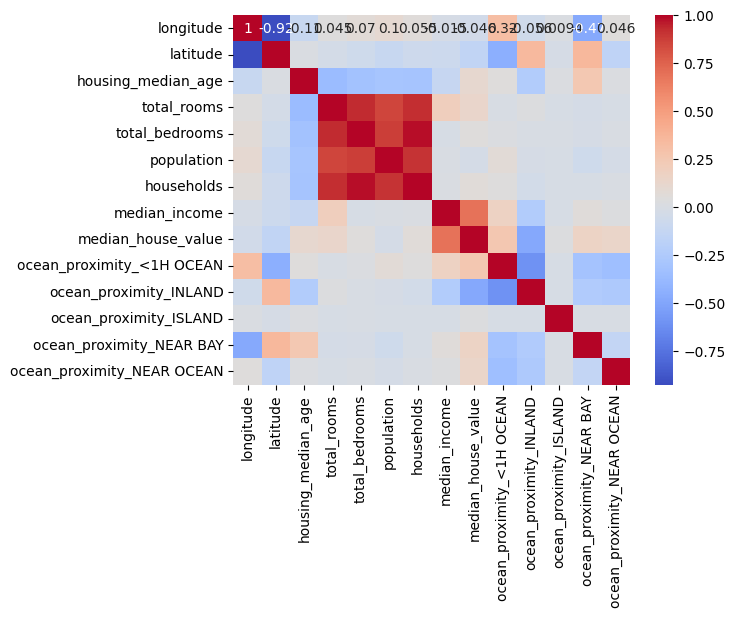

In [30]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [31]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [32]:
data.dropna(inplace = True)

In [33]:
data.count()

longitude                     20433
latitude                      20433
housing_median_age            20433
total_rooms                   20433
total_bedrooms                20433
population                    20433
households                    20433
median_income                 20433
median_house_value            20433
ocean_proximity_<1H OCEAN     20433
ocean_proximity_INLAND        20433
ocean_proximity_ISLAND        20433
ocean_proximity_NEAR BAY      20433
ocean_proximity_NEAR OCEAN    20433
dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(data[['total_rooms', 'households', 'total_bedrooms' , 'population', 'median_house_value']])  # Replace 'feature1', 'feature2', ... with your feature names

# Replace the original features with the scaled ones
data[['total_rooms', 'households', 'total_bedrooms' , 'population', 'median_house_value']] = scaled_features


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data.drop("median_house_value", axis=1)  # Features (all columns except the target)
y = data["median_house_value"]  # Target variable


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LinearRegression
# Create the linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.4367338817223555
Mean Squared Error: 0.3603952607354783
Root Mean Squared Error: 0.6003292935843446
